# **Exploring the effect of phone features on pricing**

## Data https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv

## GitHub: https://github.com/ArielJosephCohen/Mod_5_P

## Deck: https://docs.google.com/presentation/d/1_igi1IM-bah3LhsbrlclEXndclVpjCQVZg2Q0Xxwx-c/edit#slide=id.g35f391192_00

# **Notebook**

## Importing and exploring initial data

In [776]:
import pandas as pd
import numpy as np
import random as rnd
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# metrics
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [660]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [661]:
X2 = df2.copy()
X2.drop('id',axis=1,inplace=True)

In [715]:
print(X2.shape)
X2.head()

(1000, 20)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [797]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [711]:
df[['battery_power','ram','int_memory','mobile_wt','n_cores','px_height','px_width','sc_h','sc_w','talk_time']].describe()

,battery_power,ram,int_memory,mobile_wt,n_cores,px_height,px_width,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,2124.213000,32.046500,140.249000,4.520500,645.108000,1251.515500,12.306500,5.767000,11.011000
std,439.418206,1084.732044,18.145715,35.399655,2.287837,443.780811,432.199447,4.213245,4.356398,5.463955
min,501.000000,256.000000,2.000000,80.000000,1.000000,0.000000,500.000000,5.000000,0.000000,2.000000
25%,851.750000,1207.500000,16.000000,109.000000,3.000000,282.750000,874.750000,9.000000,2.000000,6.000000
50%,1226.000000,2146.500000,32.000000,141.000000,4.000000,564.000000,1247.000000,12.000000,5.000000,11.000000
75%,1615.250000,3064.500000,48.000000,170.000000,7.000000,947.250000,1633.000000,16.000000,9.000000,16.000000
max,1998.000000,3998.000000,64.000000,200.000000,8.000000,1960.000000,1998.000000,19.000000,18.000000,20.000000


## Separate data

In [666]:
X = df.drop('price_range',axis=1) 
y = df['price_range']

In [667]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


## EDA

In [723]:
y.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

## Check correlation

In [668]:
abs(X.corr()>=0.7)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
blue,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
clock_speed,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
dual_sim,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
fc,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
four_g,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
int_memory,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
m_dep,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
mobile_wt,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
n_cores,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


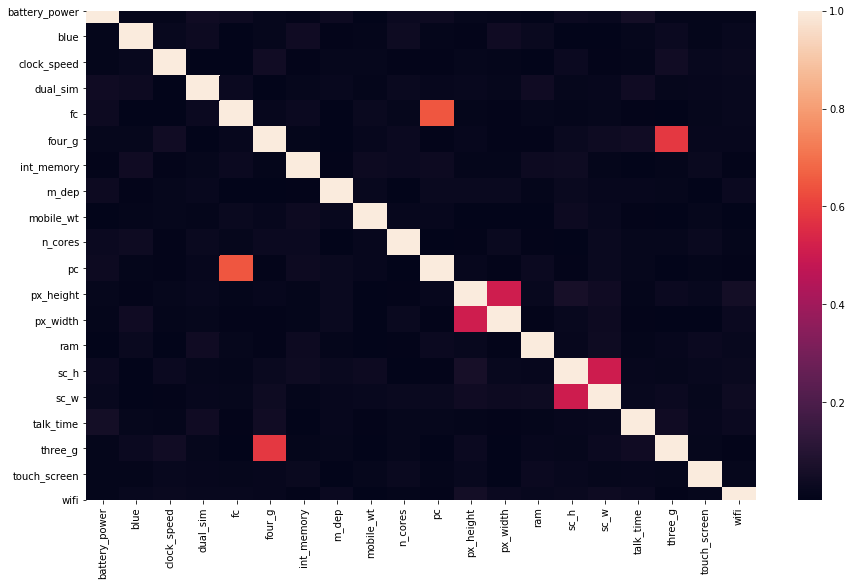

In [719]:
plt.figure(figsize=(15,9))
sns.heatmap(abs(X.corr()))

## Divide into categorical and numerical

In [670]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [671]:
num_list=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

In [672]:
X_num = X[num_list]
X_cat = X.drop(num_list,axis=1)

In [673]:
X_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [674]:
X_cat.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0


## Visualize relationships

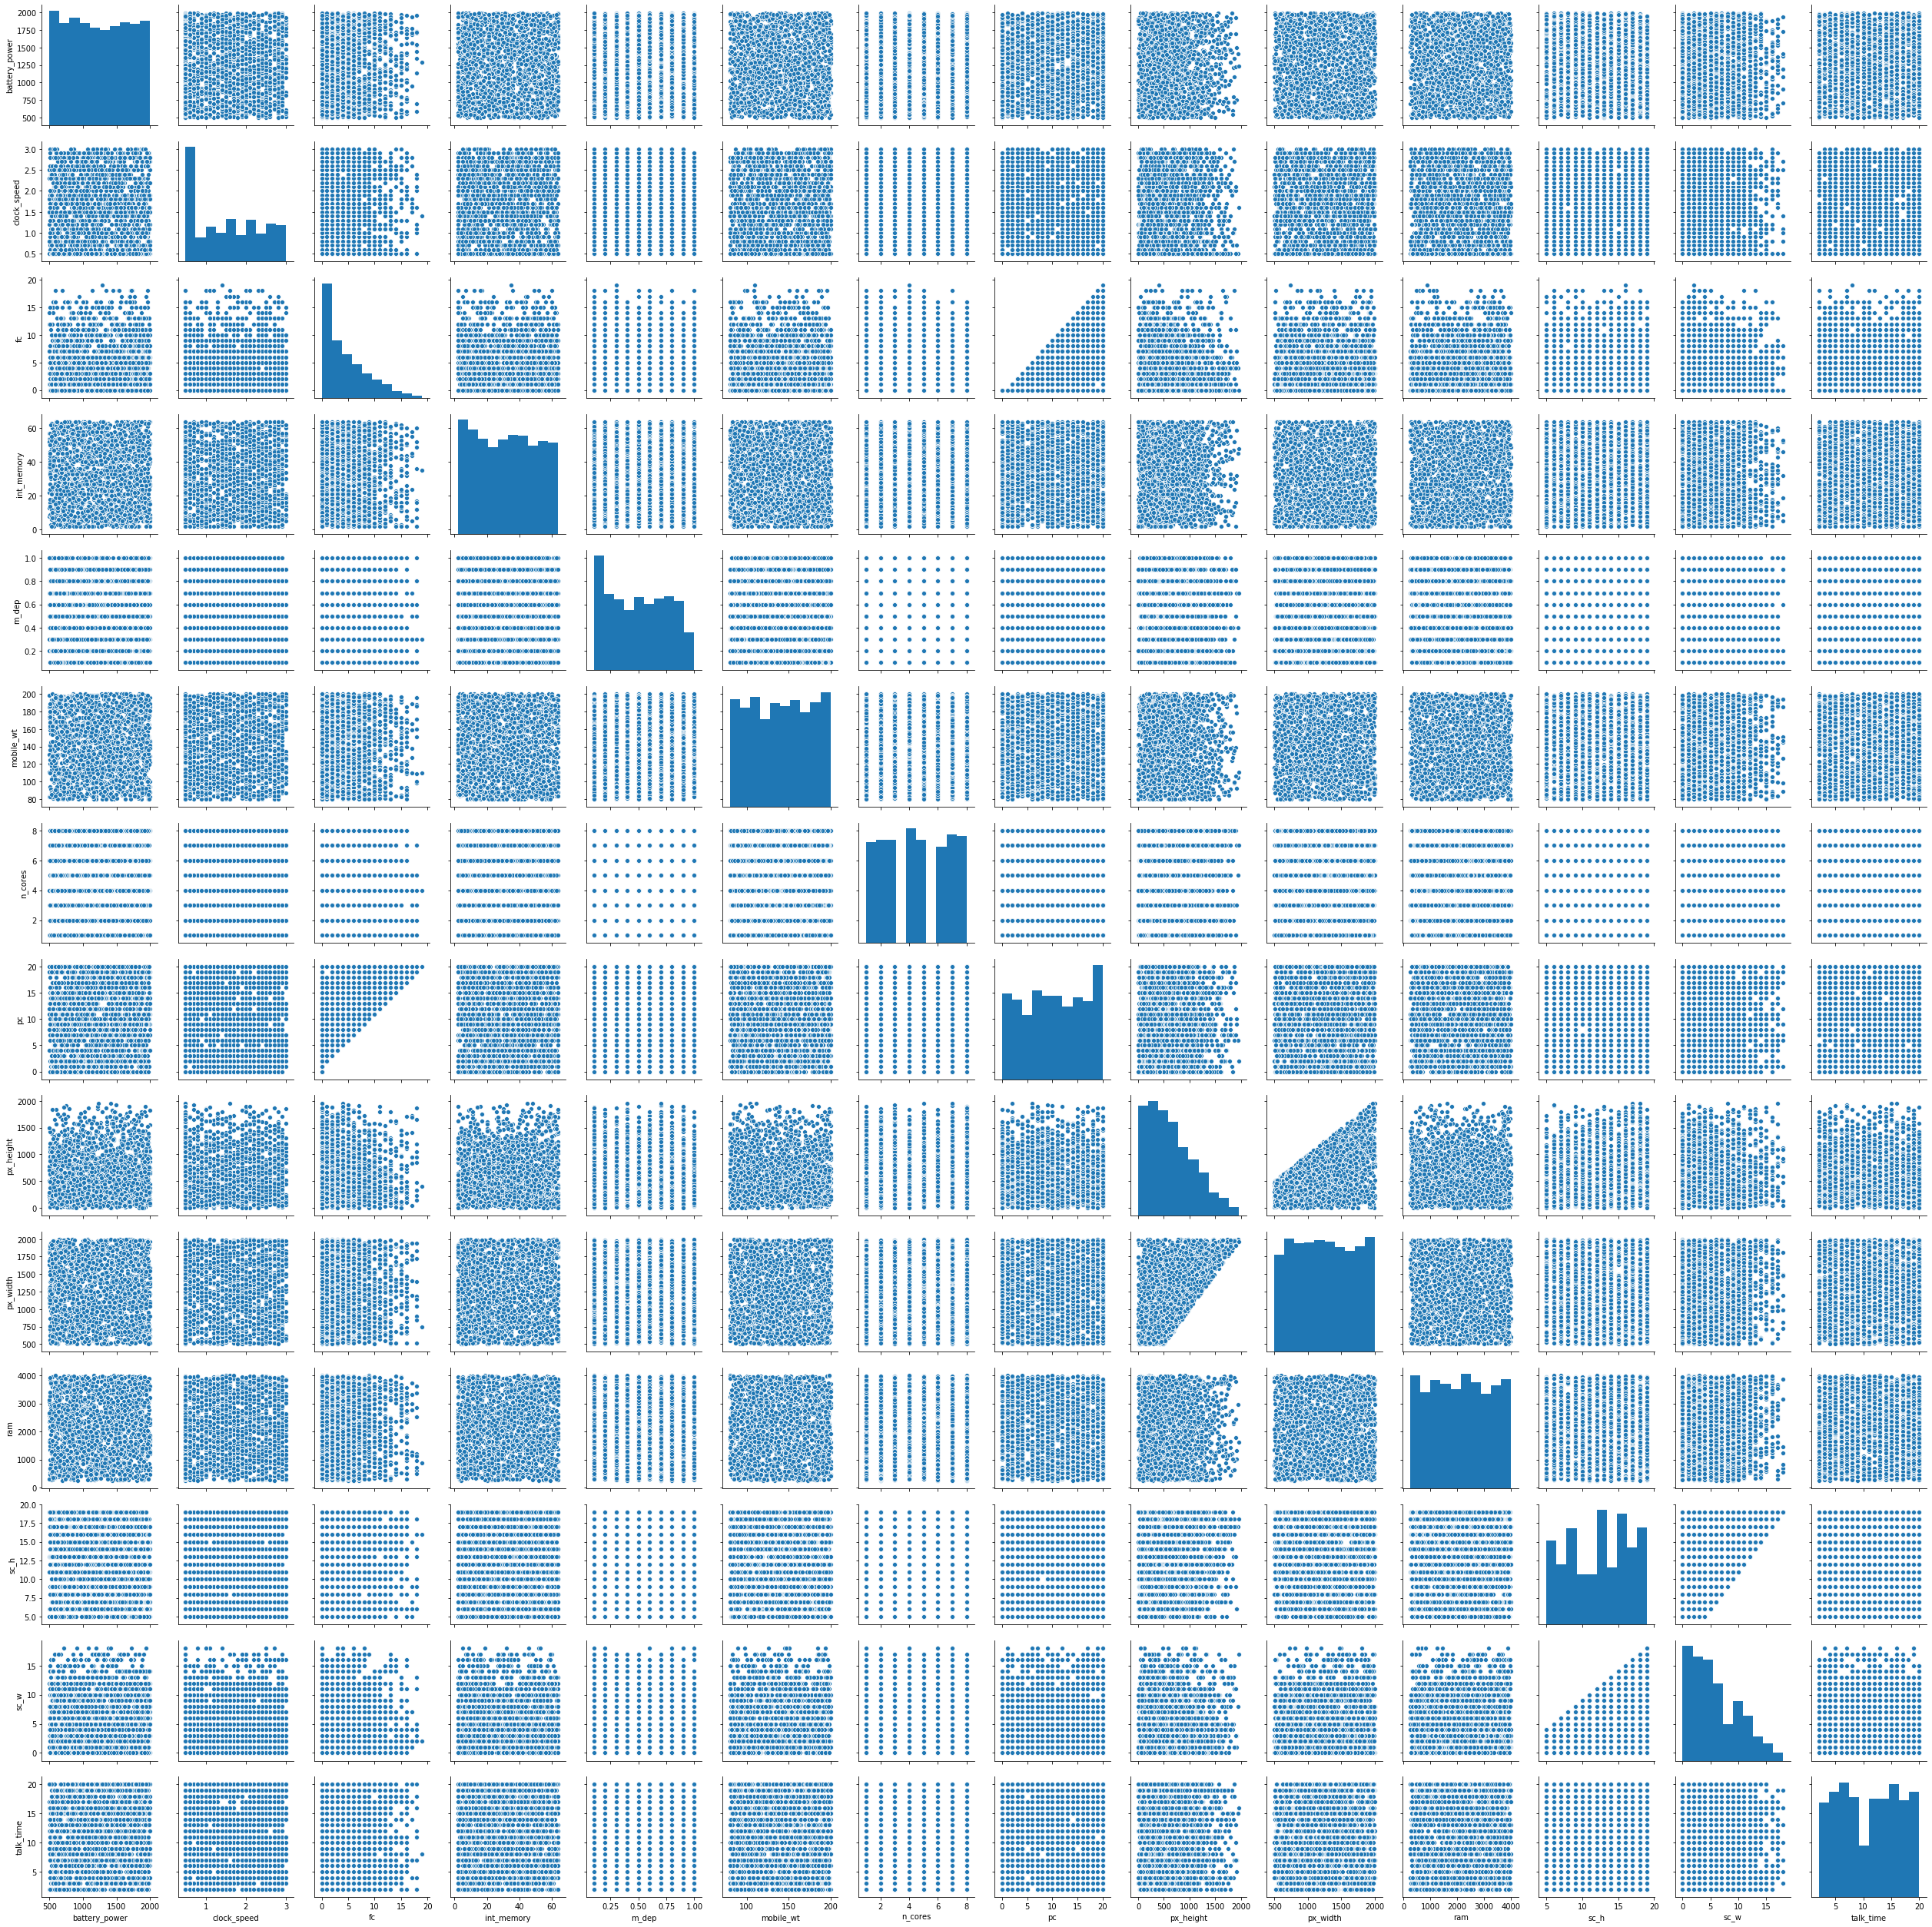

In [551]:
sns.pairplot(X_num)

## Scale, filter outliers, and normalize data

In [675]:
scaler = MinMaxScaler()
for col in X_num.columns:
    X_num[col] = scaler.fit_transform(X[[col]])

In [676]:
X_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222


In [677]:
X_cat.columns

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')

In [678]:
X_scaled = X_num.copy()
for col in X_cat.columns:
    X_scaled[col]=X_cat[col]

In [679]:
X_scaled.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,0,0,0,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,1,1,1,0
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,1,1,1,0
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,1,0,0
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,0,1,1,1,0


In [680]:
X_scaled.shape

(2000, 20)

In [681]:
df_with_y = X_scaled.copy()
df_with_y['price_range']=y

In [682]:
print(df_with_y.shape)
df_with_y.head()

(2000, 21)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,...,0.285714,0.388889,0.944444,0,0,0,0,0,1,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,...,0.857143,0.166667,0.277778,1,1,1,1,1,0,2
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,...,0.428571,0.111111,0.388889,1,1,1,1,1,0,2
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,...,0.785714,0.444444,0.500000,1,0,0,1,0,0,2
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,...,0.214286,0.111111,0.722222,1,0,1,1,1,0,1


In [683]:
df_with_y = df_with_y[(np.abs(stats.zscore(df_with_y)) <= 2.5).all(axis=1)]
print(df_with_y.shape)
df_with_y.head()

(1907, 21)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,...,0.285714,0.388889,0.944444,0,0,0,0,0,1,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,...,0.857143,0.166667,0.277778,1,1,1,1,1,0,2
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,...,0.428571,0.111111,0.388889,1,1,1,1,1,0,2
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,...,0.785714,0.444444,0.500000,1,0,0,1,0,0,2
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,...,0.214286,0.111111,0.722222,1,0,1,1,1,0,1


In [684]:
X1 = df_with_y.drop('price_range',axis=1)
y1 = df_with_y['price_range']

In [685]:
print(X1.shape)
X1.head()

(1907, 20)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,0,0,0,1
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,1,1,1,0
2,0.041416,0.00,0.105263,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,1,1,1,0
3,0.076152,0.80,0.000000,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,1,0,0
4,0.881764,0.28,0.684211,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,0,1,1,1,0


In [686]:
X1.shape[0]==y1.shape[0]

True

In [689]:
for col in num_list:
    X1[col]=list(stats.boxcox(abs(X1[col]+0.5)))[0]

In [690]:
print(X1.shape)
X1.head()

(1907, 20)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,-0.287187,0.169716,-0.861523,-0.461863,0.054864,0.381238,-0.378564,-0.431021,-0.761227,-0.348390,0.111233,-0.216337,-0.119310,0.421539,0,0,0,0,0,1
1,-0.157055,-0.625475,-1.076734,0.305140,0.160750,-0.033487,-0.221423,-0.206925,-0.039291,0.462713,0.132508,0.352475,-0.423949,-0.229703,1,1,1,1,1,0
2,-0.506339,-0.625475,-0.686936,0.126019,0.359451,0.041434,0.070732,-0.206925,0.131656,0.298747,0.125255,-0.071644,-0.519920,-0.112883,1,1,1,1,1,0
3,-0.463690,0.273027,-1.076734,-0.403187,0.262090,-0.075792,0.208352,-0.050403,0.111403,0.341567,0.168078,0.282663,-0.057516,0.000000,1,0,0,1,0,0
4,0.359706,-0.239378,0.153158,0.171835,0.054864,0.008324,-0.378564,0.194196,0.107897,-0.024793,-0.196400,-0.289476,-0.519920,0.216039,1,0,1,1,1,0


## Train-Test-Split

In [740]:
df_atg = X1.copy()
df_atg['price_range']=y
print(df_atg.shape)
df_atg.head()

(1907, 21)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,-0.287187,0.169716,-0.861523,-0.461863,0.054864,0.381238,-0.378564,-0.431021,-0.761227,-0.348390,...,-0.216337,-0.119310,0.421539,0,0,0,0,0,1,1
1,-0.157055,-0.625475,-1.076734,0.305140,0.160750,-0.033487,-0.221423,-0.206925,-0.039291,0.462713,...,0.352475,-0.423949,-0.229703,1,1,1,1,1,0,2
2,-0.506339,-0.625475,-0.686936,0.126019,0.359451,0.041434,0.070732,-0.206925,0.131656,0.298747,...,-0.071644,-0.519920,-0.112883,1,1,1,1,1,0,2
3,-0.463690,0.273027,-1.076734,-0.403187,0.262090,-0.075792,0.208352,-0.050403,0.111403,0.341567,...,0.282663,-0.057516,0.000000,1,0,0,1,0,0,2
4,0.359706,-0.239378,0.153158,0.171835,0.054864,0.008324,-0.378564,0.194196,0.107897,-0.024793,...,-0.289476,-0.519920,0.216039,1,0,1,1,1,0,1


In [736]:
from sklearn.model_selection import train_test_split

In [741]:
X_train, X_test, y_train, y_test = train_test_split(df_atg.drop('price_range',axis=1),df_atg.price_range,test_size=0.3)

## Modeling and Metrics

In [780]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

77.66

In [781]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

83.42

In [782]:
# kNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

37.7

In [783]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

79.06

In [784]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc

80.98

In [785]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

73.47

In [786]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

84.47

In [790]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

87.96

In [795]:
importances = random_forest.feature_importances_
importance_df = pd.DataFrame(importances).T
importance_df.columns = X_train.columns
importance_df.T

,0
battery_power,0.072291
clock_speed,0.028569
fc,0.024947
int_memory,0.037884
m_dep,0.025348
mobile_wt,0.041399
n_cores,0.022774
pc,0.031728
px_height,0.056013
px_width,0.056135


## Summary

In [788]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False).T

,3,7,0,6,4,2,5,1
Model,Random Forest,Decision Tree,Support Vector Machines,Linear SVC,Naive Bayes,Logistic Regression,Stochastic Gradient Decent,KNN
Score,87.61,84.47,83.42,80.98,79.06,77.66,73.47,37.7
